# Project 1 

# 1. Cleaning, exploring the data.

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Dataset ('AviationData.csv')

In [2]:
Qdf = pd.read_csv('./data/Aviation_Data.csv')

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Qdf.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
Qdf.shape

(90348, 31)

In [5]:
Qdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

There seem like big portions of missing values in Latitude, Longitude, Airport code, Airport name, aircraft. categories, FAR. Description, Schedule, Air carrier, broad.phase.of.flight.

The datatypes are objects and floats.

In [6]:
# pd.set_option('display.max_rows', None)

# Looking into models and makes in the crashes

And some Data Cleaning

In [7]:
Qdf['Make'].value_counts()

Cessna           22227
Piper            12029
CESSNA            4922
Beech             4330
PIPER             2841
                 ...  
Lessel               1
Pascucci             1
GIER TRAVIS H        1
DARYL BAKER          1
Jobe's               1
Name: Make, Length: 8237, dtype: int64

It seems like there is a lot of cleaning we have to do.
Cessna, CESSNA are the same make. 
Same for BOEING nad Boeing.BEECH and Beech, Aero Vodochody Aero Works and Aero Vodochody Aero. Works.
Aerofab Inc. and Aerofab, Inc.
Piper and PIPER.
BELL and Bell.


Aerostar International                
Aerostar International Inc            
Aerostar International Inc.           
Aerostar International, Inc.          
Air Tractor                         
Air Tractor Inc                       
Air Tractor Inc.                      
Air Tractor, Inc.                     
Airbus Industrie                   
Airbus Industries                     
Grumman                           
Grumman American                  
... more



Clean the NaNs

I am planning to drop the NaNs. They are only 1.7% of the values.

In [8]:
Qdf1 = Qdf.dropna(subset=['Make']) # drop the NaNs

In [9]:
Qdf1['Make'].isna().sum()

0

In [10]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].str.strip().str.upper()

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [11]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AEROSTAR INTERNATIONAL INC": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL INC.": "AEROSTAR INTERNATIONAL",
    "AEROSTAR INTERNATIONAL, INC.": "AEROSTAR INTERNATIONAL"})

In [12]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN CHAMPION (ACAC)": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT": "AMERICAN CHAMPION",
    "AMERICAN CHAMPION AIRCRAFT COR": "AMERICAN CHAMPION"})

In [13]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AMERICAN LEGAND AIRCRAFT": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT CO.": "AMERICAN LEGEND",
    "AMERICAN LEGEND AIRCRAFT COMPA": "AMERICAN LEGEND"})

In [14]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "FIREFLY BALLOON, INC.": "FIREFLY",
    "FIREFLY BALLOONS": "FIREFLY",
    "FIREFLY BALLOONS 2010 INC": "FIREFLY",
    "FIREFLY BALLOONS INC": "FIREFLY",
    "FIREFLY BALLOONS, INC": "FIREFLY"})

In [15]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "AIR TRACTOR INC": "AIR TRACTOR",
    "AIR TRACTOR INC.": "AIR TRACTOR",
    "AIR TRACTOR, INC.": "AIR TRACTOR"})

In [16]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
"GRUMMAN ACFT ENG":"GRUMMAN",
"GRUMMAN ACFT ENG COR":"GRUMMAN",
"GRUMMAN ACFT ENG COR-SCHWEIZER":"GRUMMAN",
"GRUMMAN AIRCRAFT":"GRUMMAN",
"GRUMMAN AIRCRAFT COR-SCHWEIZER":"GRUMMAN",
"GRUMMAN AIRCRAFT ENG CORP":"GRUMMAN",      
"GRUMMAN AMERICAN":"GRUMMAN",
"GRUMMAN AMERICAN AVIATION":"GRUMMAN",
"GRUMMAN AMERICAN AVIATION CORP":"GRUMMAN",
"GRUMMAN AMERICAN AVN. CORP":"GRUMMAN",
"GRUMMAN AMERICAN AVN. CORP.":"GRUMMAN",
"GRUMMAN AMERICAN CORPORATION":"GRUMMAN",
"GRUMMAN SCHWEIZER":"GRUMMAN",
"GRUMMAN-SCHWEIZER":"GRUMMAN"})

In [17]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
    "CESNA": "CESSNA",
    "CESSNA AIRCRAFT": "CESSNA",
    "CESSNA AIRCRAFT CO": "CESSNA",
    "CESSNA AIRCRAFT CO.": "CESSNA",
    "CESSNA AIRCRAFT COMPANY": "CESSNA",
    "CESSNA ECTOR":"CESSNA",
    "CESSNA REEMS":"CESSNA",
    "CESSNA REIMS":"CESSNA",
    "CESSNA ROBERTSON":"CESSNA",
    "CESSNA SKYHAWK II":"CESSNA",
    "CESSNA SOLOY":"CESSNA",
    "CESSNA WREN":"CESSNA",
    "CESSNA/AIR REPAIR INC":"CESSNA",
    "CESSNA/WEAVER":"CESSNA"})

In [18]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({                
"PIPER / LAUDEMAN":"PIPER",
"PIPER AEROSTAR":"PIPER",            
"PIPER AIRCRAFT":"PIPER",
"PIPER AIRCRAFT CORPORATION":"PIPER",
"PIPER AIRCRAFT INC":"PIPER",
"PIPER AIRCRAFT, INC.":"PIPER",
"PIPER CUB CRAFTERS":"PIPER",
"PIPER PAWNEE":"PIPER",
"PIPER-AEROSTAR":"PIPER",
"PIPER-HARRIS":"PIPER",
"PIPER/CUB CRAFTERS":"PIPER",
"PIPER/STEVENS":"PIPER",
"PIPER/WALLY'S FLYERS INC":"PIPER"})      

In [19]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({  
"BOEING (STEARMAN)":"BOEING",
"BOEING - CANADA (DE HAVILLAND)":"BOEING",
"BOEING 777-306ER":"BOEING",
"BOEING COMMERCIAL AIRPLANE GRO":"BOEING",
"BOEING COMPANY":"BOEING",
"BOEING COMPANY, LONG BEACH DIV":"BOEING",
"BOEING HELICOPTERS DIV.":"BOEING",
"BOEING OF CANADA/DEHAV DIV":"BOEING",
"BOEING STEARMAN":"BOEING",
"BOEING VERTOL":"BOEING",
"BOEING-BROWN":"BOEING",
"BOEING-STEARMAN":"BOEING",
"BOEING-VERTOL":"BOEING"})

In [20]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
"ROBINSON HELICOPTER":"ROBINSON",
"ROBINSON HELICOPTER CO":"ROBINSON",
"ROBINSON HELICOPTER CO INC":"ROBINSON",
"ROBINSON HELICOPTER CO.":"ROBINSON",
"ROBINSON HELICOPTER COMPANY":"ROBINSON",
"ROBINSON HELICOPTERS":"ROBINSON",
"ROBINSON MICHAEL E":"ROBINSON",
"ROBINSON STEWART J":"ROBINSON"})

In [21]:
Qdf1.loc[:,"Make"] = Qdf1.loc[:,"Make"].replace({
"BEECH AIRCRAFT":"BEECH",                    
"BEECH AIRCRAFT CO.":"BEECH",
"BEECH AIRCRAFT CORP":"BEECH",
"BEECH AIRCRAFT CORPORATION":"BEECH",
"BEECHCRAFT":"BEECH",
"BEECHCRAFT CORPORATION":"BEECH",
"BEECHER":"BEECH"})

In [22]:
pd.set_option('display.max_rows', None)

In [23]:
Qdf1.loc[:,"Make"].value_counts().sort_index()

107.5 FLYING CORPORATION              1
1200                                  1
177MF LLC                             1
1977 COLFER-CHAN                      1
1ST FTR GP                            1
2000 MCCOY                            1
2001 MCGIRL                           1
2003 NASH                             1
2007 SAVAGE AIR LLC                   1
2021FX3 LLC                           2
3XTRIM                                1
5 RIVERS LLC                          1
67 FLYING DUTCHMAN                    1
737                                   2
777                                   1
781569 INC                            1
85 MANISTA                            1
A PAIR OF JACKS                       1
A. H. GETTINGS                        1
A. LE FRANCOIS                        1
A. SCHLEICHER GMBH & CO.              1
AAA AIRCRAFT LEASING                  1
AAA AIRCRAFT LLC                      1
AARDEMA ROBERT JOHN                   1
AB SPORTINE AVIACIJA                  6


In [24]:
Qdf1['Make'].value_counts()

CESSNA                            27213
PIPER                             14934
BEECH                              5413
BOEING                             2824
BELL                               2722
ROBINSON                           1682
GRUMMAN                            1647
MOONEY                             1334
BELLANCA                           1045
HUGHES                              932
AIR TRACTOR                         918
SCHWEIZER                           773
AERONCA                             636
MCDONNELL DOUGLAS                   608
MAULE                               589
CHAMPION                            519
STINSON                             439
AERO COMMANDER                      429
DE HAVILLAND                        422
LUSCOMBE                            414
AEROSPATIALE                        388
NORTH AMERICAN                      383
TAYLORCRAFT                         383
ROCKWELL                            355
HILLER                              348


Seems like I can pull out the top 15 makes now,even there are still some naming issues.

In [25]:
Top_15_Makes = list (Qdf1['Make'].value_counts()[:15].index)

In [26]:
Top_15_Makes_Crash_Counts = list (Qdf1['Make'].value_counts()[:15].values)
Top_15_Makes_Crash_Counts

[27213,
 14934,
 5413,
 2824,
 2722,
 1682,
 1647,
 1334,
 1045,
 932,
 918,
 773,
 636,
 608,
 589]

Text(0.5, 1.0, 'Top 15 Makes in Crashes')

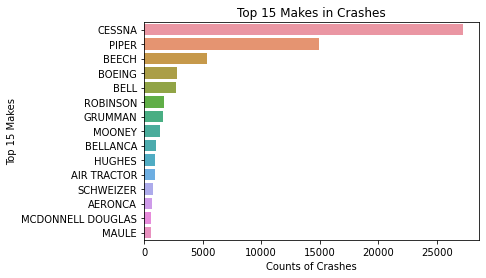

In [27]:
fig,ax = plt.subplots()
sns.barplot(x=Top_15_Makes_Crash_Counts,y=Top_15_Makes,ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 15 Makes')
ax.set_title('Top 15 Makes in Crashes')

Explore the models within of the top 15 makes

In [28]:
Qdf1[['Make','Model']].value_counts() # this gives with both make and model, counts of crashes from high to low.

Make                            Model               
CESSNA                          152                     2367
                                172                     1754
                                172N                    1164
PIPER                           PA-28-140                932
CESSNA                          150                      829
                                172M                     798
                                172P                     689
                                182                      659
                                180                      621
                                150M                     585
PIPER                           PA-18                    580
                                PA-18-150                577
                                PA-28-180                572
                                PA-28-161                569
                                PA-28-181                532
BELL                            

Make a new column 'Make_and_Model' to combine make and model

In [29]:
Qdf1['Make_and_Model'] = Qdf1['Make']+str(' ')+Qdf1['Model']

<ipython-input-29-0fa3b8baa062>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Qdf1['Make_and_Model'] = Qdf1['Make']+str(' ')+Qdf1['Model']


In [30]:
top_50_make_and_model_crashes= Qdf1['Make_and_Model'].value_counts()[:50]

In [31]:
top_50_make_and_model =list(top_50_make_and_model_crashes.index)

In [32]:
top_50_make_and_model_crashes =list(top_50_make_and_model_crashes.values)

Text(0.5, 1.0, 'Top 50 Makes and Models in Crashes')

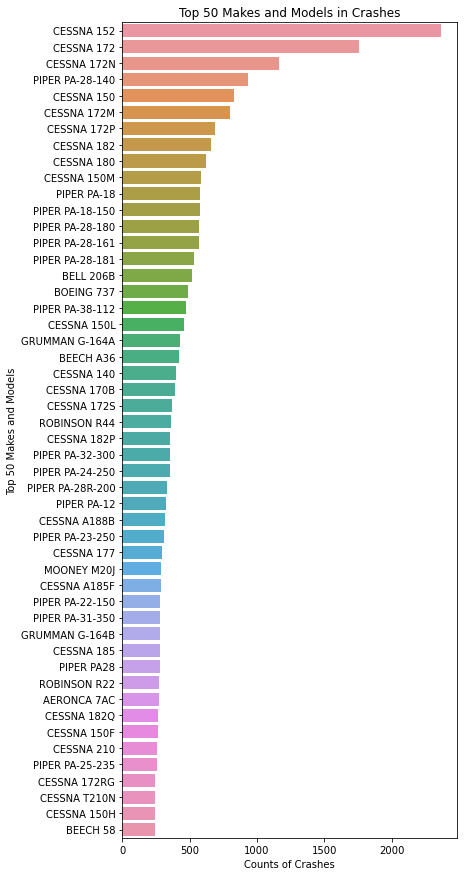

In [33]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=top_50_make_and_model_crashes,y=top_50_make_and_model, ax=ax)
ax.set_xlabel('Counts of Crashes')
ax.set_ylabel('Top 50 Makes and Models')
ax.set_title('Top 50 Makes and Models in Crashes')


# Looking into Weather Conditions and Crashes

In [34]:
Qdf1['Weather.Condition'].value_counts()

VMC    77282
IMC     5973
UNK      855
Unk      262
Name: Weather.Condition, dtype: int64

In [35]:
#UNK and Unk are the same. I am going to combine both.
Qdf1.loc[:,'Weather.Condition']=Qdf1.loc[:,'Weather.Condition'].str.strip().str.upper()

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


(array([ 1117.,     0.,     0.,  5973.,     0.,     0., 77282.,     0.,
            0.,  4454.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

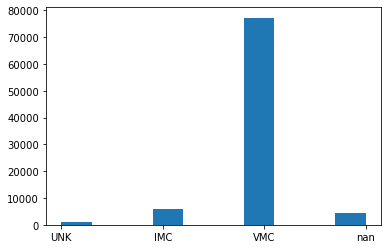

In [36]:
plt.hist(Qdf1['Weather.Condition'])

Looks like VMC has the most counts.
From googling: 
VMC: Visual Meteorological Conditions. Clear conditions. Visibility more than 5km, min. cloudbase 1500 ft
IMC: Instrument Meteorogical Conditions, is weather that require the use of instruments, typically cloudy or low visibility. These data points seems like extreme weather conditions or unclear conditions.

In [37]:
Qdf1.loc[:,'Weather.Condition'] =Qdf1.loc[:,'Weather.Condition'].fillna('VMC')

Text(0.5, 1.0, 'Weather Conditions with Crashes Counts')

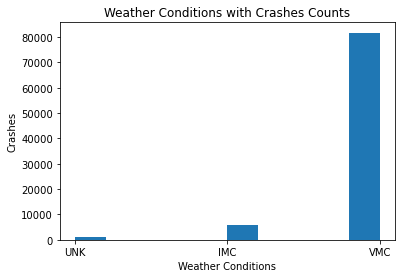

In [38]:
plt.hist(Qdf1['Weather.Condition'])
plt.xlabel('Weather Conditions')
plt.ylabel('Crashes')
plt.title('Weather Conditions with Crashes Counts')

In [39]:
Qdf1['Weather.Condition'].value_counts(normalize=True)

VMC    0.920181
IMC    0.067244
UNK    0.012575
Name: Weather.Condition, dtype: float64

Conclusion: 92% of crashes happened under VMC, or clear conditions.

# Purposes of flights and crashes

In [40]:
Qdf1['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.597949
Instructional                0.128223
Unknown                      0.082176
Aerial Application           0.056994
Business                     0.048599
Positioning                  0.019909
Other Work Use               0.015289
Ferry                        0.009821
Aerial Observation           0.009604
Public Aircraft              0.008709
Executive/corporate          0.006689
Flight Test                  0.004887
Skydiving                    0.002201
External Load                0.001488
Public Aircraft - Federal    0.001270
Banner Tow                   0.001222
Air Race show                0.001197
Public Aircraft - Local      0.000895
Public Aircraft - State      0.000774
Air Race/show                0.000714
Glider Tow                   0.000641
Firefighting                 0.000484
Air Drop                     0.000133
ASHO                         0.000073
PUBS                         0.000048
PUBL                         0.000012
Name: Purpos

Looks like 60% of the crashes are personal, 13% of the crashes are instructional, 8% are unknown, 6% are aerial applications.

In [41]:
Qdf1.loc[:,'Purpose.of.flight'] = Qdf1.loc[:,'Purpose.of.flight'].fillna(pd.Series(np.random.choice([
    'Personal','Instructional','Unknown','Aerial Application','Business','Positioning','Other Work Use',
    'Ferry','Aerial Observation','Public Aircraft','Executive/corporate'], 
    p =[0.60,0.13,0.08,0.06,0.05,0.02,0.02,0.01,0.01,0.01,0.01], size= len(Qdf1))))

In [42]:
Qdf1['Purpose.of.flight'].value_counts(normalize=True)

Personal                     0.598061
Instructional                0.128869
Unknown                      0.082101
Aerial Application           0.057242
Business                     0.048463
Positioning                  0.019887
Other Work Use               0.015525
Ferry                        0.009796
Aerial Observation           0.009582
Public Aircraft              0.008655
Executive/corporate          0.006836
Flight Test                  0.004565
Skydiving                    0.002056
External Load                0.001390
Public Aircraft - Federal    0.001186
Banner Tow                   0.001141
Air Race show                0.001119
Public Aircraft - Local      0.000836
Public Aircraft - State      0.000723
Air Race/show                0.000667
Glider Tow                   0.000599
Firefighting                 0.000452
Air Drop                     0.000124
ASHO                         0.000068
PUBS                         0.000045
PUBL                         0.000011
Name: Purpos

In [43]:
top_10_flight_purposes = list(Qdf1['Purpose.of.flight'].value_counts()[:10].index)

In [44]:
top_10_flight_purposes_crashes = list(Qdf1['Purpose.of.flight'].value_counts()[:10].values)

Text(0.5, 1.0, 'Top 10 Purposes of Crashed Flights')

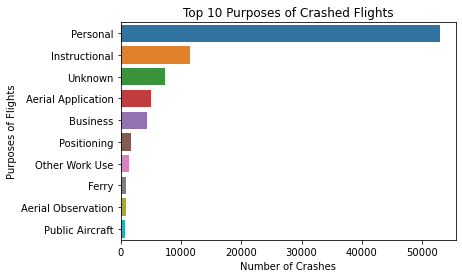

In [45]:
fig,ax= plt.subplots()
sns.barplot(x=top_10_flight_purposes_crashes, y=top_10_flight_purposes)
ax.set_xlabel('Number of Crashes')
ax.set_ylabel('Purposes of Flights')
ax.set_title('Top 10 Purposes of Crashed Flights')

# Looking into Engine Types

In [46]:
Qdf1['Engine.Type'].isna().sum()

7026

In [47]:
Qdf1.loc[:,'Engine.Type'] =Qdf1.loc[:,'Engine.Type'].fillna('Reciprocating')

/Users/echocai/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [48]:
Engine_Type_Counts = Qdf1['Engine.Type'].value_counts()
Engine_Type_Counts

Reciprocating      76545
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2050
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
UNK                    1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [49]:
Engine_Type = list(Engine_Type_Counts.index)
Engine_Type

['Reciprocating',
 'Turbo Shaft',
 'Turbo Prop',
 'Turbo Fan',
 'Unknown',
 'Turbo Jet',
 'None',
 'Geared Turbofan',
 'Electric',
 'NONE',
 'LR',
 'UNK',
 'Hybrid Rocket']

In [50]:
Engine_Type_Counts = list(Engine_Type_Counts.values)
Engine_Type_Counts

[76545, 3609, 3391, 2481, 2050, 703, 19, 12, 10, 2, 2, 1, 1]

<AxesSubplot:>

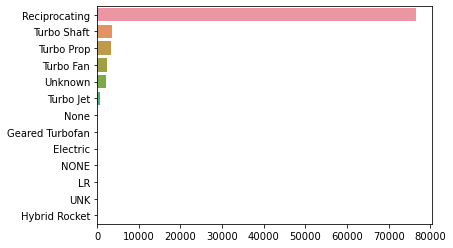

In [51]:
sns.barplot(x = Engine_Type_Counts, y = Engine_Type)

It seems like Reciprocating engine has the most crashes.

Combine Engine Types with Purpose of flights might give us more insights?

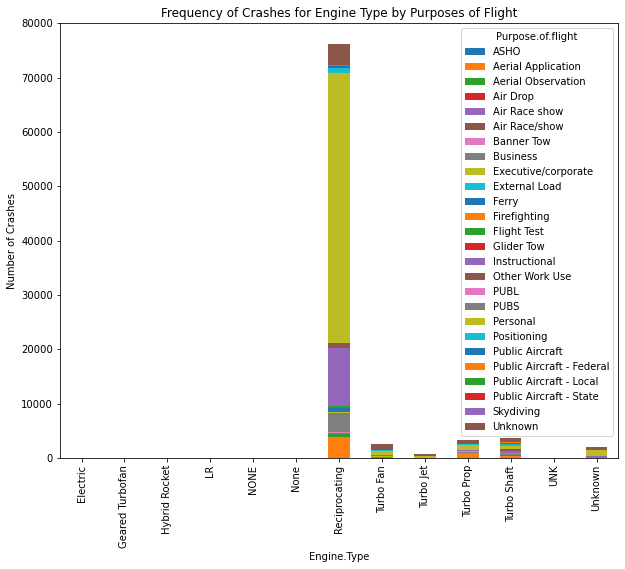

In [52]:
Qdf2 = Qdf1.groupby(['Engine.Type', 'Purpose.of.flight']).size().unstack()
Qdf2.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Engine.Type')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes for Engine Type by Purposes of Flight')
plt.show()

This graph shows that reciprocating engines with personal, instructional, aerial applications purpooses of flights are top combinations
for crashing.

# Look into weather conditions and aircraft damage

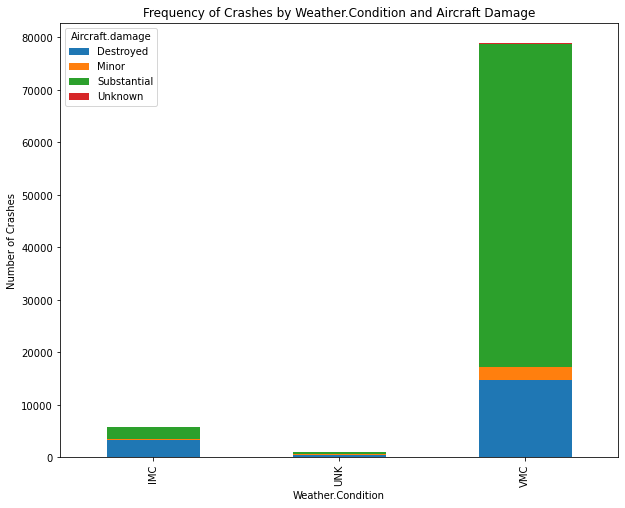

In [53]:
Qdf3 = Qdf1.groupby(['Weather.Condition', 'Aircraft.damage']).size().unstack()
Qdf3.plot(kind='bar', stacked=True, figsize=(10,8))
plt.xlabel('Weather.Condition')
plt.ylabel('Number of Crashes')
plt.title('Frequency of Crashes by Weather.Condition and Aircraft Damage')
plt.show()

It seems like weather does have correlation with aircraft damage.

IMC has greater ratio for destroyed damage level.

# To Further Discover weather condition & damage level

In [56]:
Qdf1.loc[:,'Aircraft.damage'] = Qdf1.loc[:,'Aircraft.damage'].fillna(pd.Series(np.random.choice([
    'Destroyed','Substantial','Minor'], 
    p =[0.22,0.75,0.03], size= len(Qdf1))))

In [57]:
Qdf1[Qdf1['Weather.Condition'] == "VMC"]['Aircraft.damage'].value_counts(normalize=True)

Substantial    0.778575
Destroyed      0.188021
Minor          0.031995
Unknown        0.001410
Name: Aircraft.damage, dtype: float64

Under VMC weather condition, clear condition, substantial damage is 78%, while destroyed damage is 19%.

In [58]:
Qdf1[Qdf1['Weather.Condition'] == "IMC"]['Aircraft.damage'].value_counts(normalize=True)

Destroyed      0.565712
Substantial    0.405157
Minor          0.029131
Name: Aircraft.damage, dtype: float64

Under VMC weather condition, clear condition, substantial damage is 78%, while destroyed damage is 19%.

Under IMC weather condition, unclear condition,  substantial damage is 57%, while destroyed damage is 41%.

Conclusion: under unclear condition or IMC, degree of damage is much greater than under clear condition or VMC.

In [59]:
Qdf1.to_csv('/Users/echocai/Documents/Flatiron/1Phase/Project 1/dsc-phase-1-project-v3/data/Qdf1.csv', index=False) 

Qdf1 has partial cleaned up columns 'Make','Weather.Condition','Purpose.of.flight','Engine.Type','Aircraft.damage',
and a new column 'Make_and_Model'.